In [ ]:
'''
Import packages and display settings
'''
## supress warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os
## Assign dataset path
path_data = 'C:/Users/Cody_Black/JupyterNotebook/Dataset'
os.chdir(path_data)
## display settings
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 10000000)
pd.set_option('max_info_columns', 10000000)
## Data viz lib
%matplotlib inline

In [2]:
df_Supplier = pd.read_csv('SupplierData.csv')

<img src='share_files/image/Supplier Data Definitions.png'>

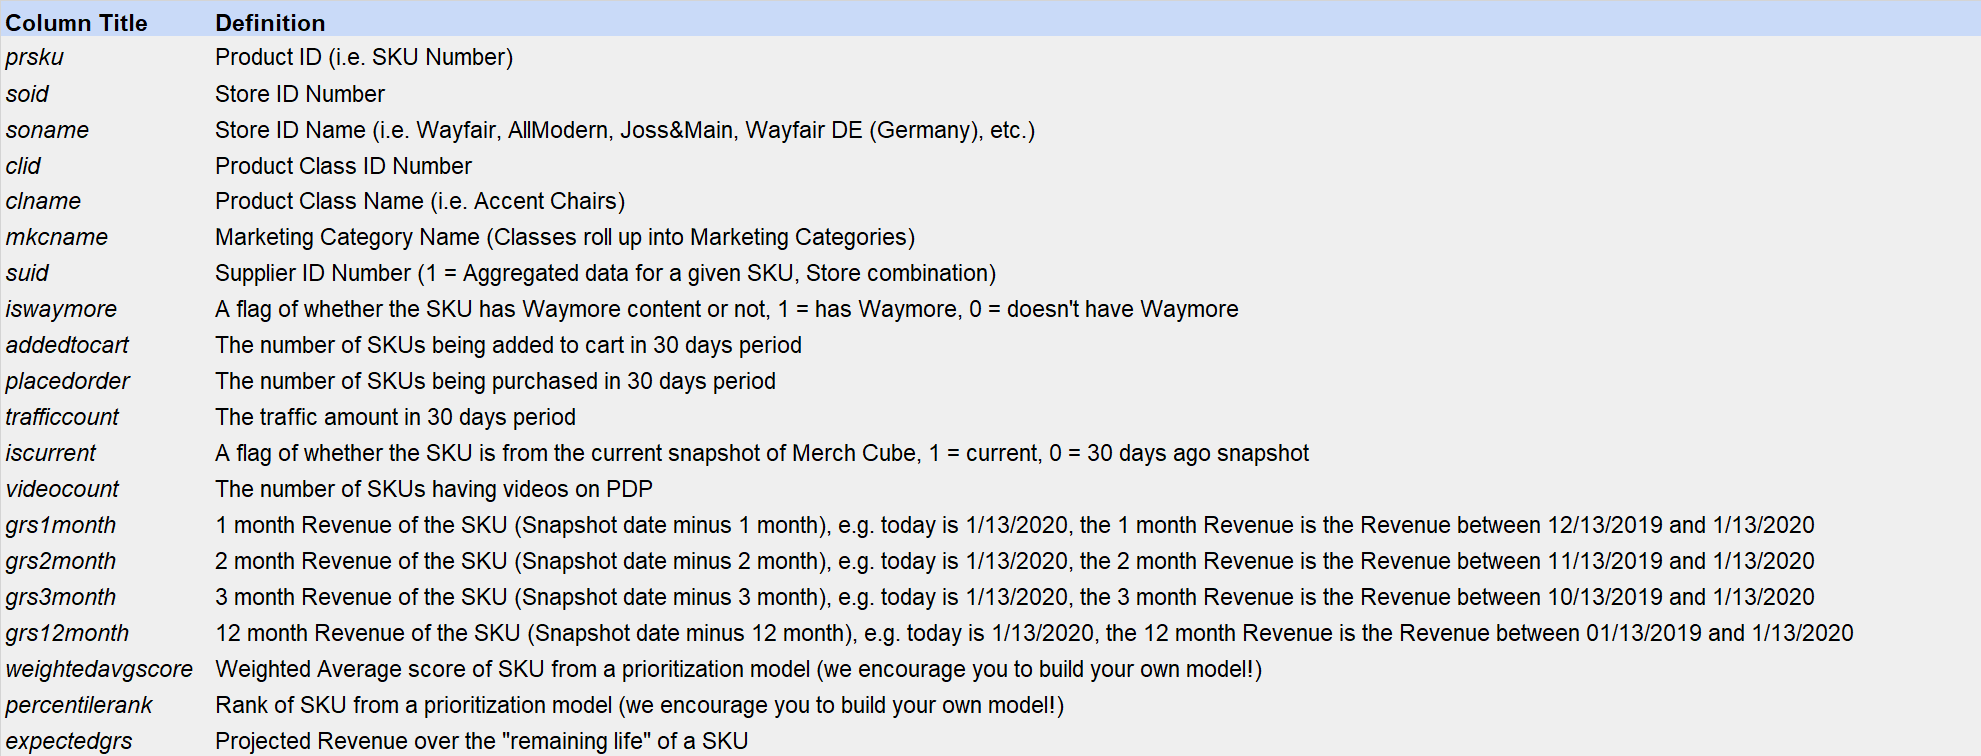

In [16]:
df_Supplier.head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
0,AAAM1028,3,Wayfair UK,21,Cribs,Nursery,1,0,0,0,14,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN
1,AABK1087,4,Wayfair DE,18,Mattress Toppers and Pads,Mattresses - Utility Bedding,7080,0,45,5,1362,1,0,265.558272,857.66493,3759.433838,6547.578930,NaN,NaN,NaN
2,AACE1000,6,Wayfair CA,15,Area Rugs,Rugs,1,0,0,0,0,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN
3,AACF1003,3,Wayfair UK,15,Area Rugs,Rugs,4312,0,0,0,25,1,0,0.000000,0.00000,0.000000,342.437186,NaN,NaN,NaN
4,AACF1005,3,Wayfair UK,15,Area Rugs,Rugs,1,0,1,0,7,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN


## Check for each product which sold by specific store and supplier
<h5>Is it having only one "iscurrent"=1?
<h5>Namely, is is possible for a prodcut to have multiple current rows (lastest snapshot)?


In [19]:
'''
Column "is current" is either 0 or 1, so Aggregating by sum to check its value.
If there are values greater than 1, it means the product might have multiple current rows.
'''

df_Supplier.groupby(['prsku','soid','suid']).agg(sum_iscurrent=('iscurrent', sum))[:10]

sum_iscurrent
prsku    soid suid               
AAAM1028 3    1                 1
AAAM1029 3    1                 1
AAAM1032 3    1                 1
AAAM1034 3    1                 1
AAAQ1153 3    1                 1
              3358              1
         4    1                 1
AABK1029 4    1                 1
              7080              1
              8935              1

<h5>It confirms that there are no more than 1 iscurrent data in each product.
<h5>Also, we could find there are some products do not have iscurrent data point.

In [22]:
# Count unique values in aggregating column sum_iscurrent.

temp = df_Supplier.groupby(['prsku','soid','suid']).agg(sum_iscurrent=('iscurrent', sum))
temp['sum_iscurrent'].value_counts(dropna=False)

1    4693974
0      71748
Name: sum_iscurrent, dtype: int64